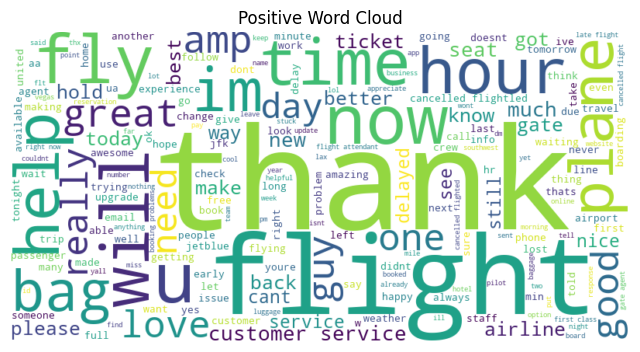

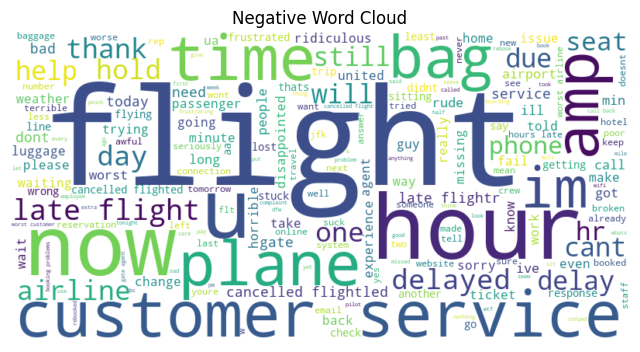

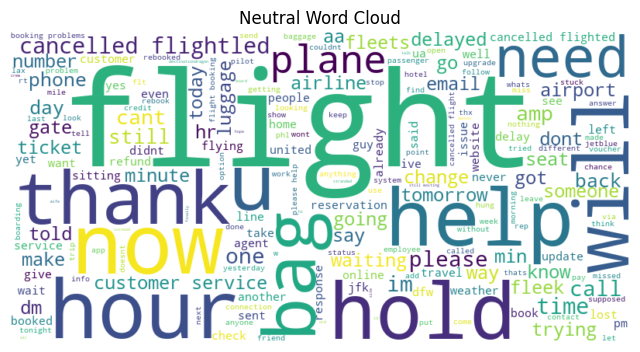

Top words in Positive: [('to', 3272), ('the', 2406), ('i', 1979), ('a', 1753), ('you', 1671), ('for', 1593), ('and', 1378), ('flight', 1265), ('on', 1226), ('my', 1095)]
Top words in Negative: [('to', 2309), ('the', 1658), ('i', 1332), ('a', 1318), ('flight', 1210), ('and', 1129), ('for', 1054), ('on', 964), ('you', 946), ('is', 943)]
Top words in Neutral: [('to', 3062), ('i', 2064), ('the', 1989), ('on', 1588), ('you', 1493), ('a', 1474), ('flight', 1420), ('for', 1348), ('my', 1316), ('and', 1202)]


C:\Users\mukke\AppData\Local\Temp\ipykernel_6792\4165735984.py:54: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




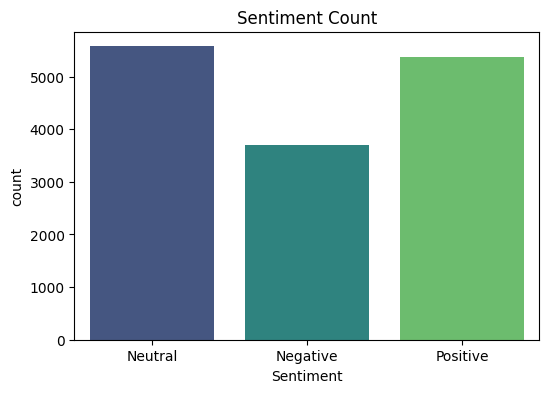

In [5]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from textblob import TextBlob
from wordcloud import WordCloud
from collections import Counter
df = pd.read_csv(r"C:\Users\mukke\OneDrive\Desktop\git\PRODIGY_DS_04\Tweets.csv")  
def clean_text(text):
    text = re.sub(r'http\S+', '', str(text))
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    return text.lower()

df['Cleaned_Text'] = df['text'].apply(clean_text)
def get_sentiment(text):
    score = TextBlob(text).sentiment.polarity
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['Cleaned_Text'].apply(get_sentiment)
sentiment_counts = df['Sentiment'].value_counts()
fig_pie = px.pie(
    names=sentiment_counts.index,
    values=sentiment_counts.values,
    title='Sentiment Distribution',
    color_discrete_sequence=px.colors.qualitative.Set3
)
fig_pie.show()
df['Date'] = pd.to_datetime(df['tweet_created'])
trend = df.groupby([df['Date'].dt.date, 'Sentiment']).size().reset_index(name='Count')
fig_line = px.line(trend, x='Date', y='Count', color='Sentiment', title='Sentiment Trend Over Time')
fig_line.show()
for sentiment in ['Positive', 'Negative', 'Neutral']:
    text = " ".join(df[df['Sentiment'] == sentiment]['Cleaned_Text'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(8,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{sentiment} Word Cloud")
    plt.show()
for sentiment in ['Positive', 'Negative', 'Neutral']:
    words = " ".join(df[df['Sentiment'] == sentiment]['Cleaned_Text']).split()
    freq = Counter(words).most_common(10)
    print(f"Top words in {sentiment}: {freq}")
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sentiment', palette='viridis')
plt.title('Sentiment Count')
plt.show()
